## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  63.892031   317.473416  0.752091   9.378965  247.146181
1  48.987032   550.740316  0.223133  10.461941  132.054557
2  24.907374   701.716848  0.128559   1.324016   93.674810
3  37.825257  1726.304139  0.510946   9.252211  882.706853
4   9.894219   684.680329  0.001385   7.020021    9.797105


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9670051	total: 57.8ms	remaining: 57.7s
1:	learn: 0.9544084	total: 58.4ms	remaining: 29.2s
2:	learn: 0.9445029	total: 59ms	remaining: 19.6s
3:	learn: 0.9321966	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9194686	total: 60ms	remaining: 11.9s
5:	learn: 0.9076084	total: 60.4ms	remaining: 10s
6:	learn: 0.8951708	total: 60.9ms	remaining: 8.63s
7:	learn: 0.8823392	total: 61.3ms	remaining: 7.61s
8:	learn: 0.8712016	total: 61.8ms	remaining: 6.81s
9:	learn: 0.8590978	total: 62.2ms	remaining: 6.16s
10:	learn: 0.8500405	total: 62.6ms	remaining: 5.63s
11:	learn: 0.8377320	total: 63.2ms	remaining: 5.2s
12:	learn: 0.8267346	total: 63.7ms	remaining: 4.83s
13:	learn: 0.8146411	total: 64.1ms	remaining: 4.51s
14:	learn: 0.8044507	total: 64.5ms	remaining: 4.23s
15:	learn: 0.7945607	total: 64.9ms	remaining: 3.99s
16:	learn: 0.7843471	total: 65.3ms	remaining: 3.77s
17:	learn: 0.7756688	total: 65.8ms	remaining: 3.59s
18:	learn: 0.7681063	total: 66.4ms	remaining: 3.43s

118:	learn: 0.2310851	total: 108ms	remaining: 799ms
119:	learn: 0.2282496	total: 108ms	remaining: 795ms
120:	learn: 0.2252370	total: 109ms	remaining: 790ms
121:	learn: 0.2233723	total: 109ms	remaining: 786ms
122:	learn: 0.2211010	total: 110ms	remaining: 782ms
123:	learn: 0.2187630	total: 110ms	remaining: 777ms
124:	learn: 0.2160644	total: 110ms	remaining: 773ms
125:	learn: 0.2144201	total: 111ms	remaining: 769ms
126:	learn: 0.2120744	total: 111ms	remaining: 766ms
127:	learn: 0.2099523	total: 112ms	remaining: 762ms
128:	learn: 0.2082830	total: 112ms	remaining: 757ms
129:	learn: 0.2065725	total: 113ms	remaining: 753ms
130:	learn: 0.2045625	total: 113ms	remaining: 750ms
131:	learn: 0.2028767	total: 114ms	remaining: 747ms
132:	learn: 0.2010174	total: 114ms	remaining: 744ms
133:	learn: 0.1986753	total: 115ms	remaining: 741ms
134:	learn: 0.1970373	total: 115ms	remaining: 738ms
135:	learn: 0.1957207	total: 116ms	remaining: 735ms
136:	learn: 0.1936137	total: 116ms	remaining: 731ms
137:	learn: 

297:	learn: 0.0495007	total: 185ms	remaining: 437ms
298:	learn: 0.0492219	total: 186ms	remaining: 436ms
299:	learn: 0.0488674	total: 186ms	remaining: 435ms
300:	learn: 0.0485595	total: 187ms	remaining: 434ms
301:	learn: 0.0482448	total: 187ms	remaining: 432ms
302:	learn: 0.0478592	total: 187ms	remaining: 431ms
303:	learn: 0.0475292	total: 188ms	remaining: 430ms
304:	learn: 0.0471300	total: 188ms	remaining: 429ms
305:	learn: 0.0468275	total: 189ms	remaining: 428ms
306:	learn: 0.0465053	total: 189ms	remaining: 427ms
307:	learn: 0.0461814	total: 189ms	remaining: 426ms
308:	learn: 0.0458015	total: 190ms	remaining: 425ms
309:	learn: 0.0454401	total: 190ms	remaining: 424ms
310:	learn: 0.0451391	total: 191ms	remaining: 423ms
311:	learn: 0.0448419	total: 191ms	remaining: 422ms
312:	learn: 0.0445481	total: 192ms	remaining: 421ms
313:	learn: 0.0442587	total: 192ms	remaining: 420ms
314:	learn: 0.0439437	total: 192ms	remaining: 418ms
315:	learn: 0.0436367	total: 193ms	remaining: 417ms
316:	learn: 

534:	learn: 0.0162936	total: 290ms	remaining: 252ms
535:	learn: 0.0162490	total: 291ms	remaining: 252ms
536:	learn: 0.0162018	total: 291ms	remaining: 251ms
537:	learn: 0.0161520	total: 292ms	remaining: 250ms
538:	learn: 0.0161092	total: 292ms	remaining: 250ms
539:	learn: 0.0160864	total: 292ms	remaining: 249ms
540:	learn: 0.0160235	total: 293ms	remaining: 248ms
541:	learn: 0.0159918	total: 293ms	remaining: 248ms
542:	learn: 0.0159706	total: 294ms	remaining: 247ms
543:	learn: 0.0158942	total: 294ms	remaining: 247ms
544:	learn: 0.0158123	total: 294ms	remaining: 246ms
545:	learn: 0.0157379	total: 295ms	remaining: 245ms
546:	learn: 0.0156578	total: 295ms	remaining: 244ms
547:	learn: 0.0155852	total: 295ms	remaining: 244ms
548:	learn: 0.0155448	total: 296ms	remaining: 243ms
549:	learn: 0.0155022	total: 296ms	remaining: 242ms
550:	learn: 0.0154238	total: 297ms	remaining: 242ms
551:	learn: 0.0153519	total: 297ms	remaining: 241ms
552:	learn: 0.0152895	total: 297ms	remaining: 240ms
553:	learn: 

710:	learn: 0.0088302	total: 367ms	remaining: 149ms
711:	learn: 0.0088169	total: 368ms	remaining: 149ms
712:	learn: 0.0087729	total: 368ms	remaining: 148ms
713:	learn: 0.0087598	total: 369ms	remaining: 148ms
714:	learn: 0.0087469	total: 369ms	remaining: 147ms
715:	learn: 0.0087037	total: 370ms	remaining: 147ms
716:	learn: 0.0086909	total: 370ms	remaining: 146ms
717:	learn: 0.0086565	total: 371ms	remaining: 146ms
718:	learn: 0.0086188	total: 371ms	remaining: 145ms
719:	learn: 0.0086064	total: 371ms	remaining: 144ms
720:	learn: 0.0085842	total: 372ms	remaining: 144ms
721:	learn: 0.0085719	total: 372ms	remaining: 143ms
722:	learn: 0.0085598	total: 373ms	remaining: 143ms
723:	learn: 0.0085379	total: 373ms	remaining: 142ms
724:	learn: 0.0085260	total: 373ms	remaining: 142ms
725:	learn: 0.0085143	total: 374ms	remaining: 141ms
726:	learn: 0.0084935	total: 374ms	remaining: 140ms
727:	learn: 0.0084633	total: 374ms	remaining: 140ms
728:	learn: 0.0084518	total: 375ms	remaining: 139ms
729:	learn: 

960:	learn: 0.0044736	total: 471ms	remaining: 19.1ms
961:	learn: 0.0044538	total: 472ms	remaining: 18.6ms
962:	learn: 0.0044380	total: 472ms	remaining: 18.1ms
963:	learn: 0.0044275	total: 473ms	remaining: 17.7ms
964:	learn: 0.0044155	total: 473ms	remaining: 17.2ms
965:	learn: 0.0043998	total: 474ms	remaining: 16.7ms
966:	learn: 0.0043841	total: 474ms	remaining: 16.2ms
967:	learn: 0.0043700	total: 475ms	remaining: 15.7ms
968:	learn: 0.0043660	total: 475ms	remaining: 15.2ms
969:	learn: 0.0043536	total: 476ms	remaining: 14.7ms
970:	learn: 0.0043488	total: 476ms	remaining: 14.2ms
971:	learn: 0.0043387	total: 477ms	remaining: 13.7ms
972:	learn: 0.0043302	total: 477ms	remaining: 13.2ms
973:	learn: 0.0043230	total: 477ms	remaining: 12.7ms
974:	learn: 0.0043171	total: 478ms	remaining: 12.3ms
975:	learn: 0.0042977	total: 478ms	remaining: 11.8ms
976:	learn: 0.0042931	total: 479ms	remaining: 11.3ms
977:	learn: 0.0042711	total: 479ms	remaining: 10.8ms
978:	learn: 0.0042640	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

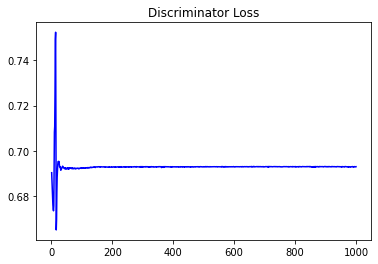

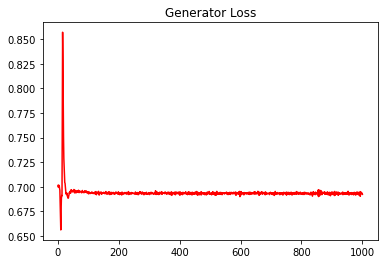

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.007149111995023028


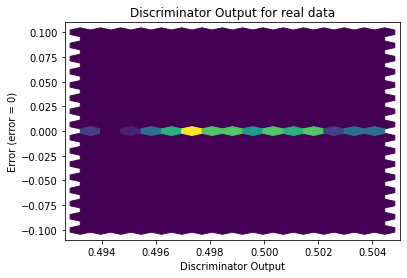

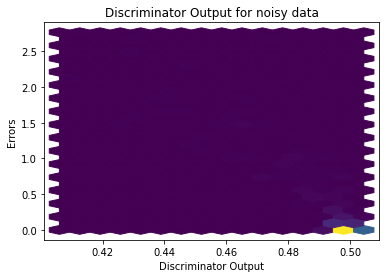

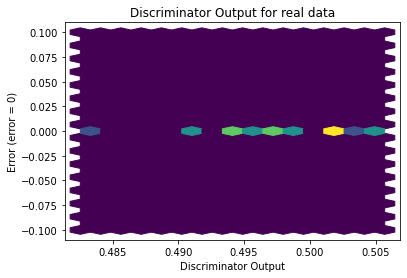

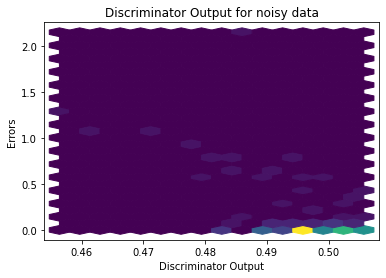

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


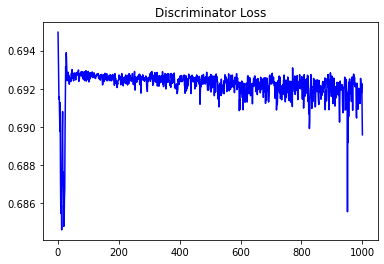

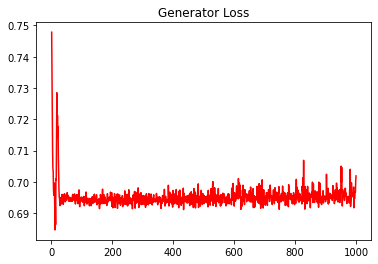

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.01215468529734925


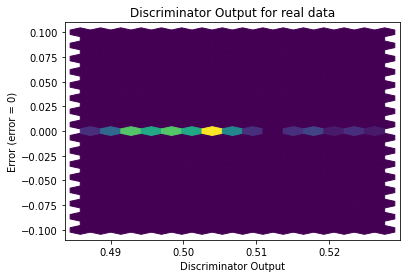

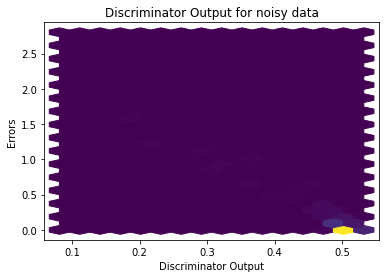

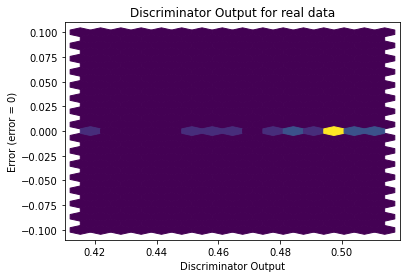

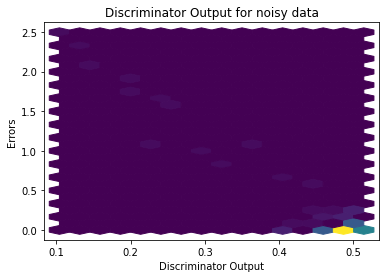

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4660]], requires_grad=True)
